## Beijing PM 2.5 prediction
by Yuen Tsai 11/28/2018

### Project description: 
Given a dataset about pm2.5 and related information in Bejing from 2010-2015, use data cleaning, feature engineering and modeling to build a ML model to predict unknown PM2.5 value.

## 1.Data cleaning and validation

### Step1 Know the data
First, load the data and see the structure of the data.

In [293]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = [16,9]
df = pd.read_csv('/Users/jimmytsai/Downloads/PRSA_data_2010.1.1-2014.12.31.csv')
df['date'] = pd.to_datetime(df[['day','month','year']])

In [294]:
plt.rcParams["figure.figsize"] = [16,9]

In [295]:
df

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,date
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0,2010-01-01
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0,2010-01-01
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0,2010-01-01
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0,2010-01-01
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0,2010-01-01
5,6,2010,1,1,5,NaN,-19,-10.0,1017.0,NW,16.10,0,0,2010-01-01
6,7,2010,1,1,6,NaN,-19,-9.0,1017.0,NW,19.23,0,0,2010-01-01
7,8,2010,1,1,7,NaN,-19,-9.0,1017.0,NW,21.02,0,0,2010-01-01
8,9,2010,1,1,8,NaN,-19,-9.0,1017.0,NW,24.15,0,0,2010-01-01
9,10,2010,1,1,9,NaN,-20,-8.0,1017.0,NW,27.28,0,0,2010-01-01


In [296]:
df[df['pm2.5'].isnull()]

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,date
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0,2010-01-01
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0,2010-01-01
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0,2010-01-01
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0,2010-01-01
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0,2010-01-01
5,6,2010,1,1,5,NaN,-19,-10.0,1017.0,NW,16.10,0,0,2010-01-01
6,7,2010,1,1,6,NaN,-19,-9.0,1017.0,NW,19.23,0,0,2010-01-01
7,8,2010,1,1,7,NaN,-19,-9.0,1017.0,NW,21.02,0,0,2010-01-01
8,9,2010,1,1,8,NaN,-19,-9.0,1017.0,NW,24.15,0,0,2010-01-01
9,10,2010,1,1,9,NaN,-20,-8.0,1017.0,NW,27.28,0,0,2010-01-01


In [297]:
df.dtypes

No                int64
year              int64
month             int64
day               int64
hour              int64
pm2.5           float64
DEWP              int64
TEMP            float64
PRES            float64
cbwd             object
Iws             float64
Is                int64
Ir                int64
date     datetime64[ns]
dtype: object

### Step2 Trim the data
Remove the value about No, year and day. The goal of this project is to predict the pm2.5 value. This data is not useful when we need to find the correlation about data.

In [298]:
df['pmvalue'] =df['pm2.5'] 
df = df.drop(['No','year','day','pm2.5'],axis =1 )

In [299]:
df

,month,hour,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,date,pmvalue
0,1,0,-21,-11.0,1021.0,NW,1.79,0,0,2010-01-01,NaN
1,1,1,-21,-12.0,1020.0,NW,4.92,0,0,2010-01-01,NaN
2,1,2,-21,-11.0,1019.0,NW,6.71,0,0,2010-01-01,NaN
3,1,3,-21,-14.0,1019.0,NW,9.84,0,0,2010-01-01,NaN
4,1,4,-20,-12.0,1018.0,NW,12.97,0,0,2010-01-01,NaN
5,1,5,-19,-10.0,1017.0,NW,16.10,0,0,2010-01-01,NaN
6,1,6,-19,-9.0,1017.0,NW,19.23,0,0,2010-01-01,NaN
7,1,7,-19,-9.0,1017.0,NW,21.02,0,0,2010-01-01,NaN
8,1,8,-19,-9.0,1017.0,NW,24.15,0,0,2010-01-01,NaN
9,1,9,-20,-8.0,1017.0,NW,27.28,0,0,2010-01-01,NaN


### Step3 See how data interact
Then we can see some relation between each column with the target value(pm2.5)

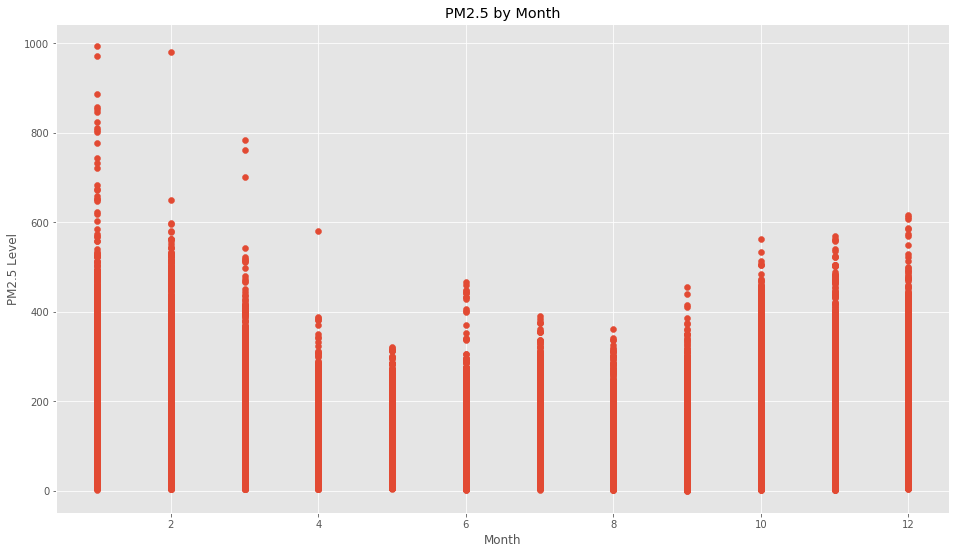

In [300]:
x = df['month']
y = df['pmvalue']
plt.scatter(x,y)
plt.xlabel('Month')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 by Month')
plt.show()

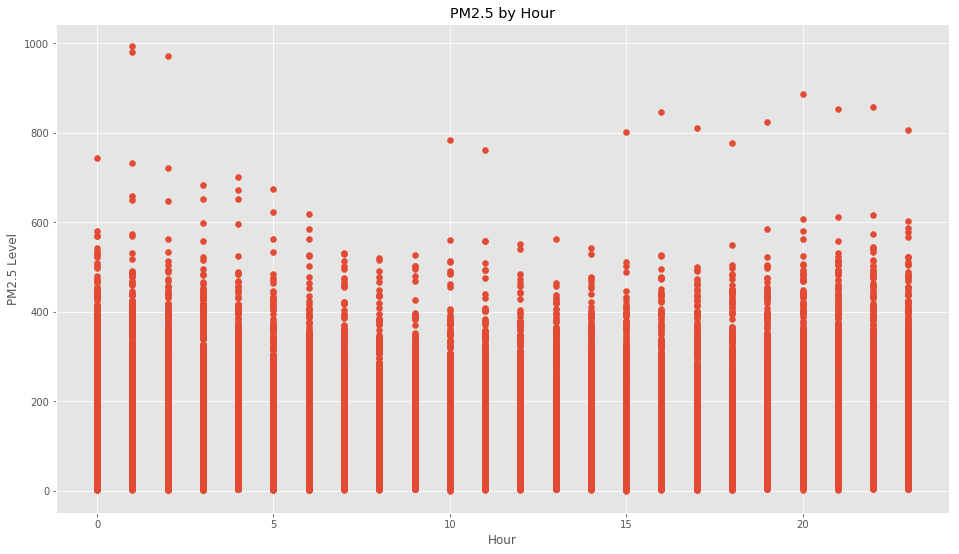

In [301]:
x = df['hour']
y = df['pmvalue']
plt.scatter(x,y)
plt.xlabel('Hour')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 by Hour')
plt.show()

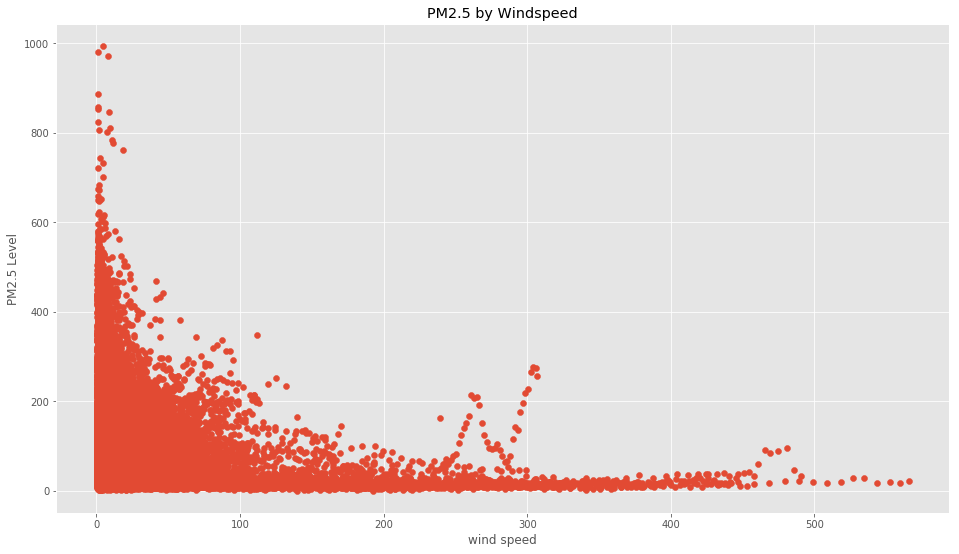

In [302]:
x = df['Iws']
y = df['pmvalue']
plt.scatter(x,y)
plt.xlabel('wind speed')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 by Windspeed')
plt.show()

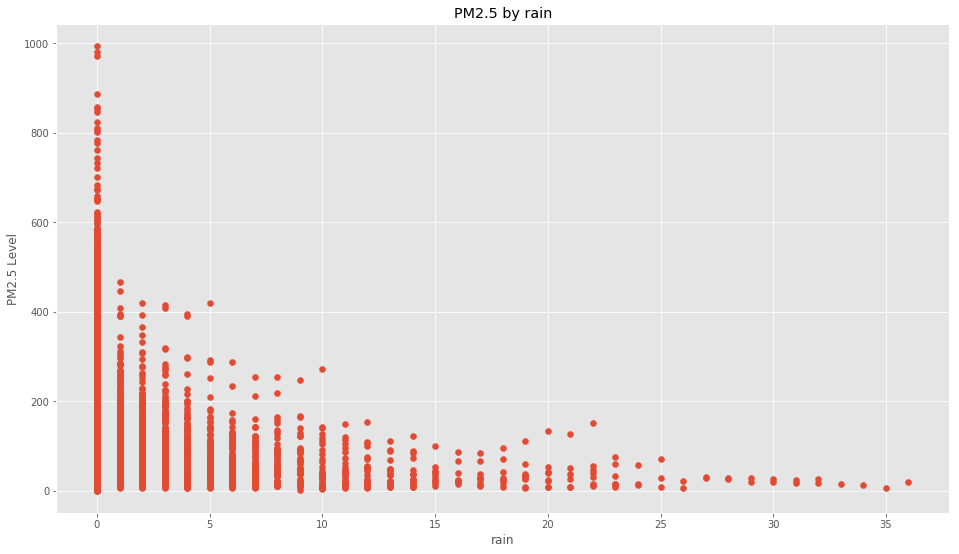

In [303]:
x = df['Ir']
y = df['pmvalue']
plt.scatter(x,y)
plt.xlabel('rain')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 by rain')
plt.show()

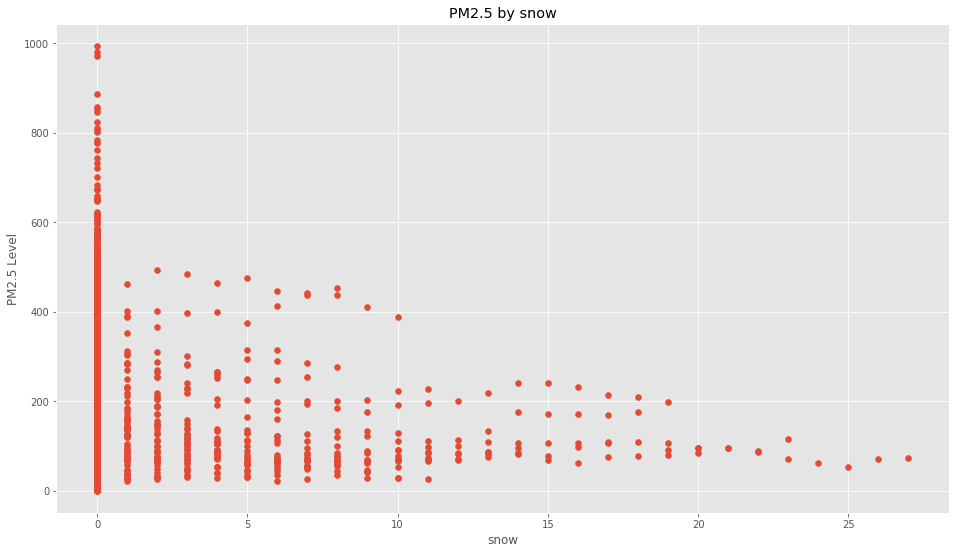

In [304]:
x = df['Is']
y = df['pmvalue']
plt.scatter(x,y)
plt.xlabel('snow')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 by snow')
plt.show()

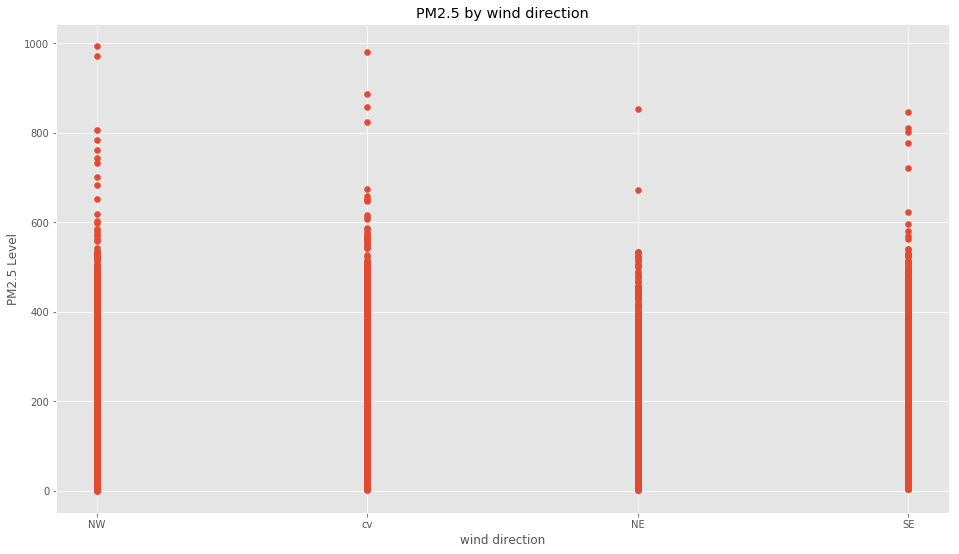

In [305]:
x = df['cbwd']
y = df['pmvalue']
plt.scatter(x,y)
plt.xlabel('wind direction')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 by wind direction')
plt.show()

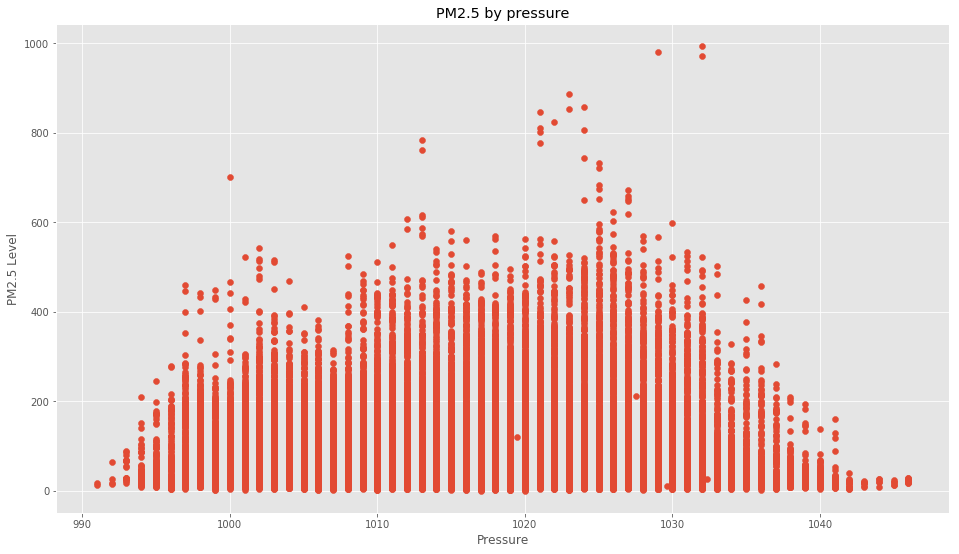

In [306]:
x = df['PRES']
y = df['pmvalue']
plt.scatter(x,y)
plt.xlabel('Pressure')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 by pressure')
plt.show()

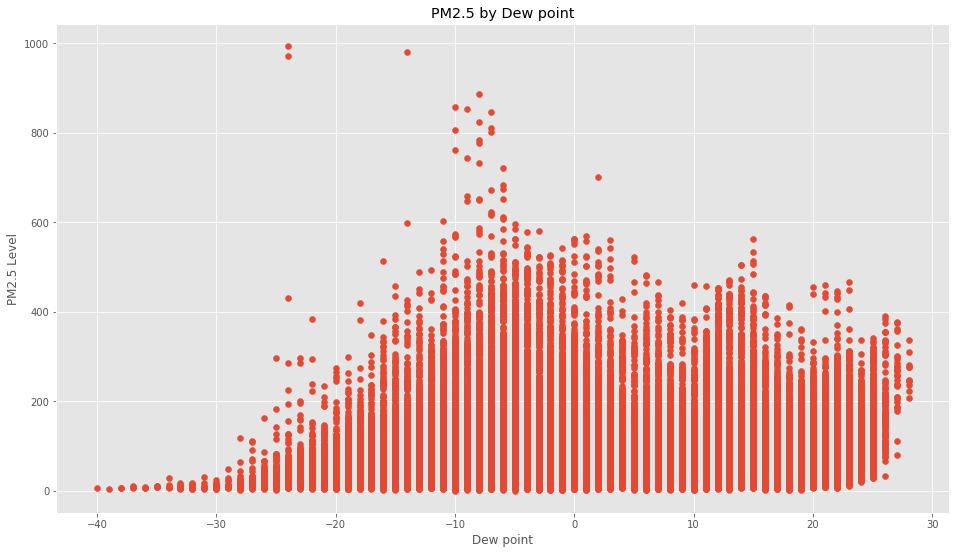

In [307]:
x = df['DEWP']
y = df['pmvalue']
plt.scatter(x,y)
plt.xlabel('Dew point')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 by Dew point')
plt.show()

#### By examing the above picture, we can know that PM2.5 have a strong relationship with pressure, dew point, snow, rain, wind direction, wind speed, hour and month

### Step4 Outlier Detection
We can show the trend of pm2.5 by time series in the plot. We can find that there are some unusual peak of the pm2.5 in specific time. So, for better prediction, we can remove those data.

In [308]:
def build_time_series(start, end):
    time_series_df = df[['date', 'pmvalue']][(df['date'] >= start) & (df['date'] <= end)]
    x = time_series_df.date
    y = time_series_df.pmvalue
    plt.plot(x,y)
    plt.xlabel('Date')
    plt.ylabel('PM2.5 Value')
    plt.title('PM2.5 Time Series')
    return plt.show();

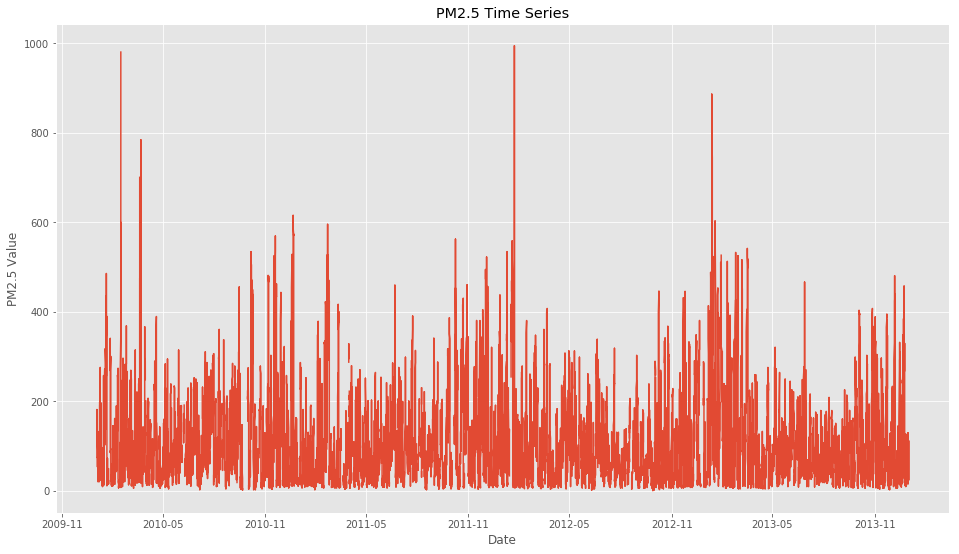

In [309]:
build_time_series('2010','2014')

In [310]:
df = df[df.pmvalue<=600]

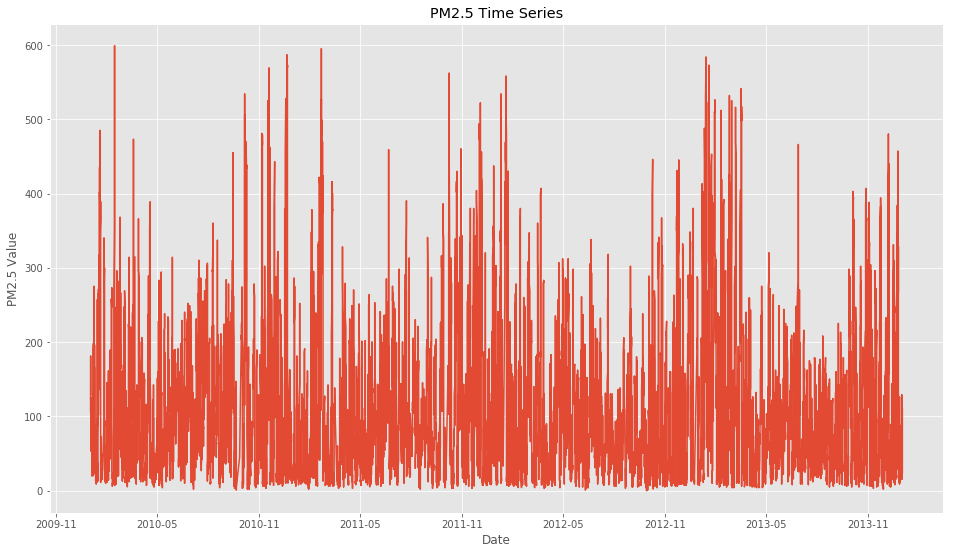

In [311]:
build_time_series('2010','2014')

In [312]:
df.head()

,month,hour,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,date,pmvalue
24,1,0,-16,-4.0,1020.0,SE,1.79,0,0,2010-01-02,129.0
25,1,1,-15,-4.0,1020.0,SE,2.68,0,0,2010-01-02,148.0
26,1,2,-11,-5.0,1021.0,SE,3.57,0,0,2010-01-02,159.0
27,1,3,-7,-5.0,1022.0,SE,5.36,1,0,2010-01-02,181.0
28,1,4,-7,-5.0,1022.0,SE,6.25,2,0,2010-01-02,138.0


In [313]:
df.describe()

,month,hour,DEWP,TEMP,PRES,Iws,Is,Ir,pmvalue
count,41725.000000,41725.000000,41725.000000,41725.000000,41725.000000,41725.000000,41725.000000,41725.000000,41725.000000
mean,6.517004,11.503391,1.758179,12.414164,1016.438322,23.881839,0.055386,0.195015,98.118226
std,3.452407,6.923426,14.435724,12.170514,10.301757,49.633398,0.779172,1.418699,90.278725
min,1.000000,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000,0.000000
25%,4.000000,5.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000,29.000000
50%,7.000000,12.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000,72.000000
75%,10.000000,18.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000,137.000000
max,12.000000,23.000000,28.000000,42.000000,1046.000000,565.490000,27.000000,36.000000,599.000000


### Step5 Missing value detection
First, we can find that there are 2067 rows of data have null value in pm2.5. These data with null value in pm2.5 are useless for us. Because we cannot use this data to do prediction.

In [314]:
print("Date contains nulls:", df.date.isnull().values.any())
print("Month contains nulls:", df.month.isnull().values.any())
print("Hour contains nulls:", df.hour.isnull().values.any())

Date contains nulls: False
Month contains nulls: False
Hour contains nulls: False


In [315]:
df.shape

(41725, 11)

In [316]:
df[df['pmvalue'].isnull()]

,month,hour,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,date,pmvalue


In [317]:
df[df['DEWP'].isnull()]

,month,hour,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,date,pmvalue


In [318]:
df[df['TEMP'].isnull()]

,month,hour,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,date,pmvalue


In [319]:
df[df['PRES'].isnull()]

,month,hour,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,date,pmvalue


In [320]:
df[df['cbwd'].isnull()]

,month,hour,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,date,pmvalue


In [321]:
df[df['Iws'].isnull()]

,month,hour,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,date,pmvalue


In [322]:
df[df['Ir'].isnull()]

,month,hour,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,date,pmvalue


In [323]:
df[df['Is'].isnull()]

,month,hour,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,date,pmvalue


#### Here we can create a map to show the relationship between each elements in our final data set.

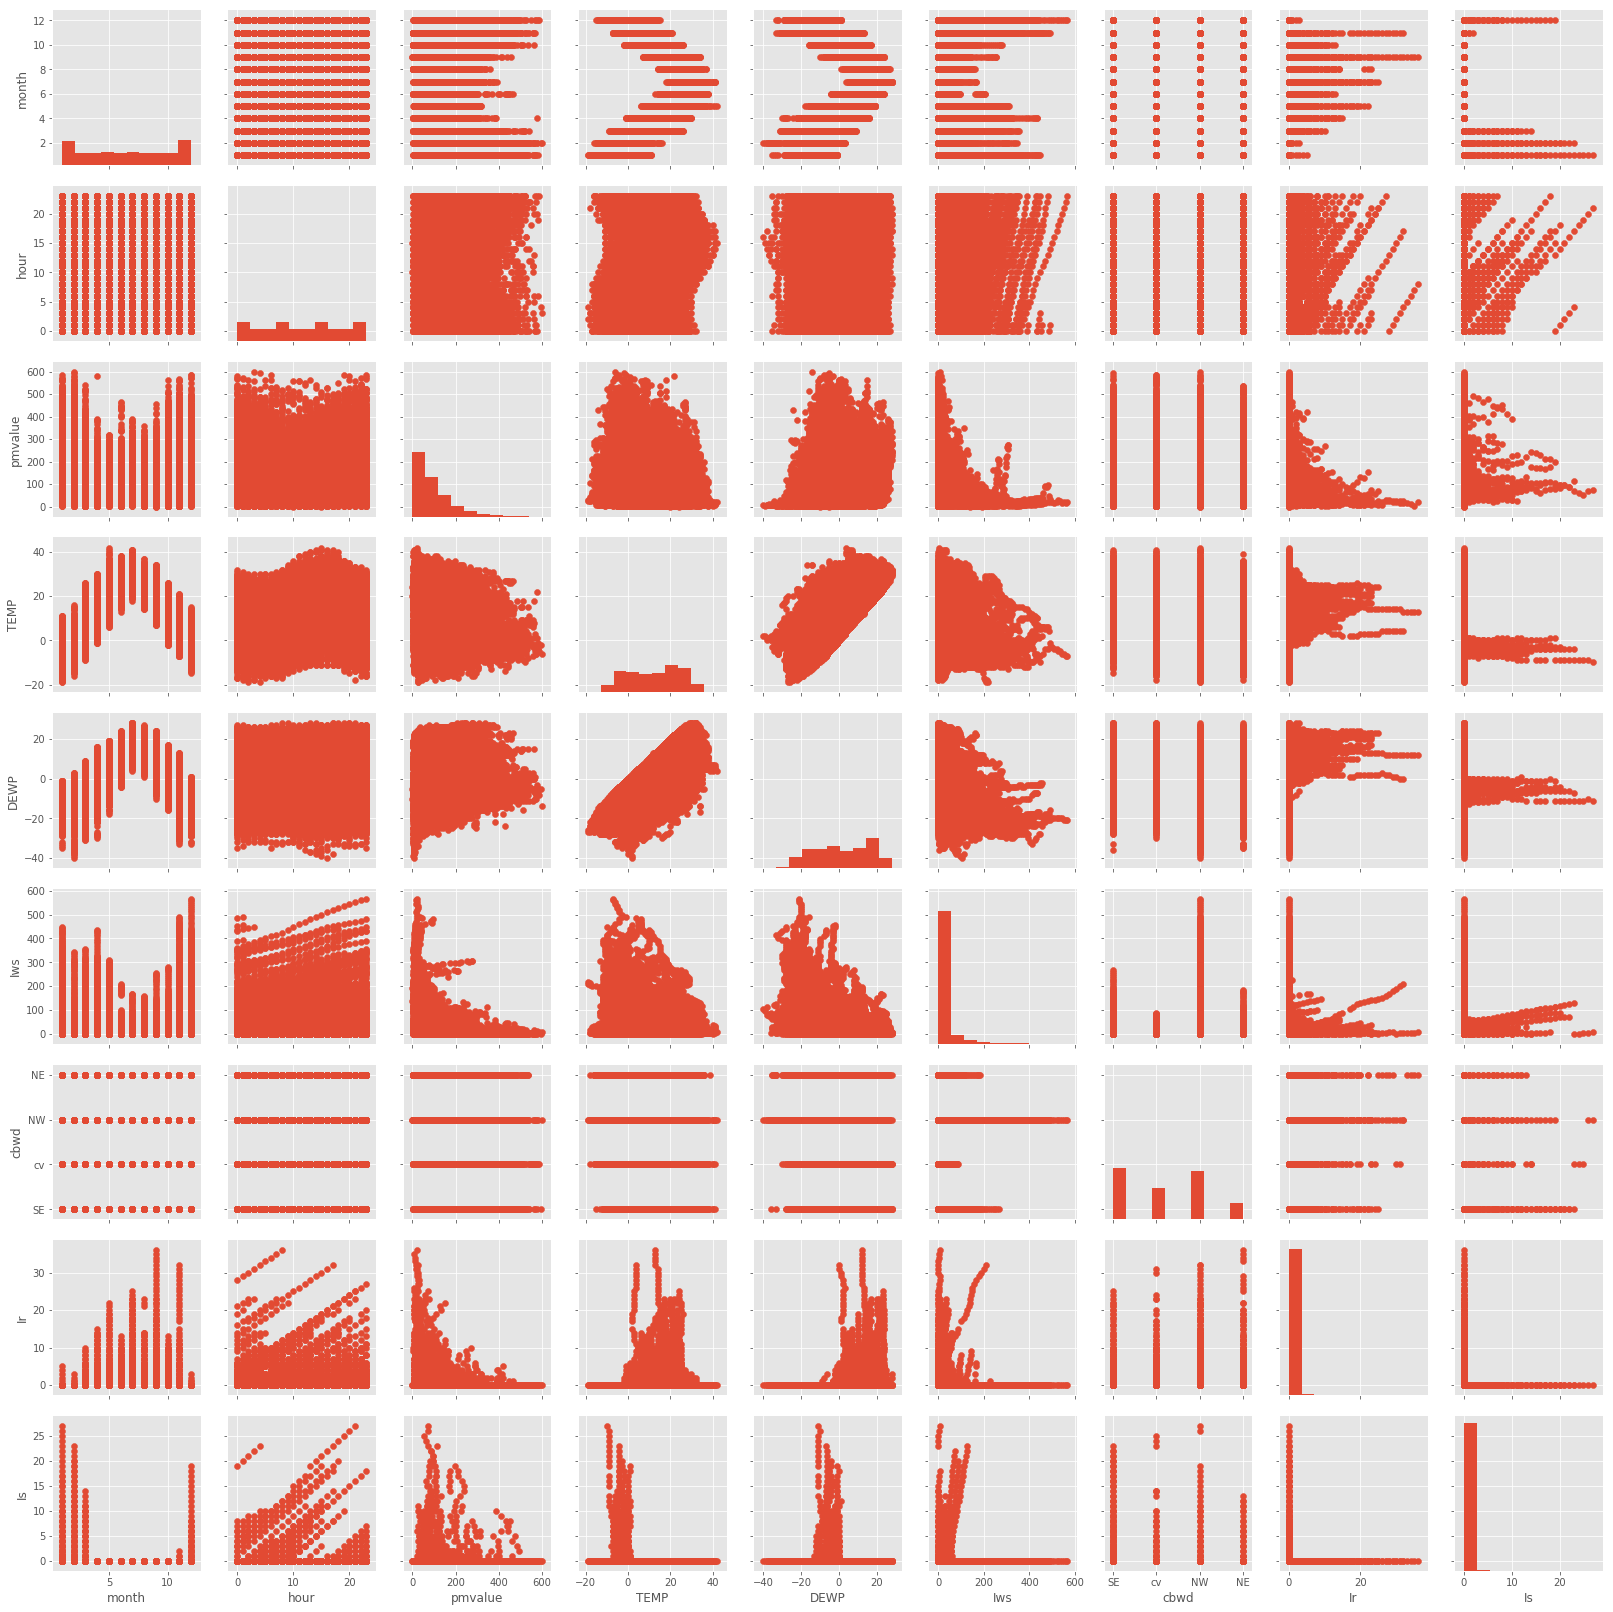

In [324]:
import seaborn as sns
g = sns.PairGrid(df, vars=["month", "hour", "pmvalue", "TEMP", "DEWP", "Iws", "cbwd", "Ir", "Is"], dropna=True)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

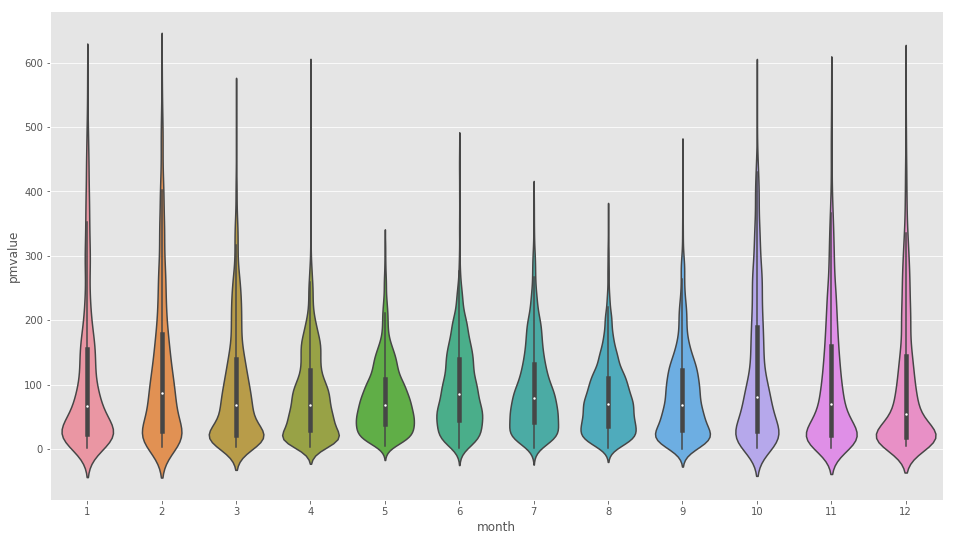

In [325]:
ax = sns.violinplot(x="month", y="pmvalue", data=df)

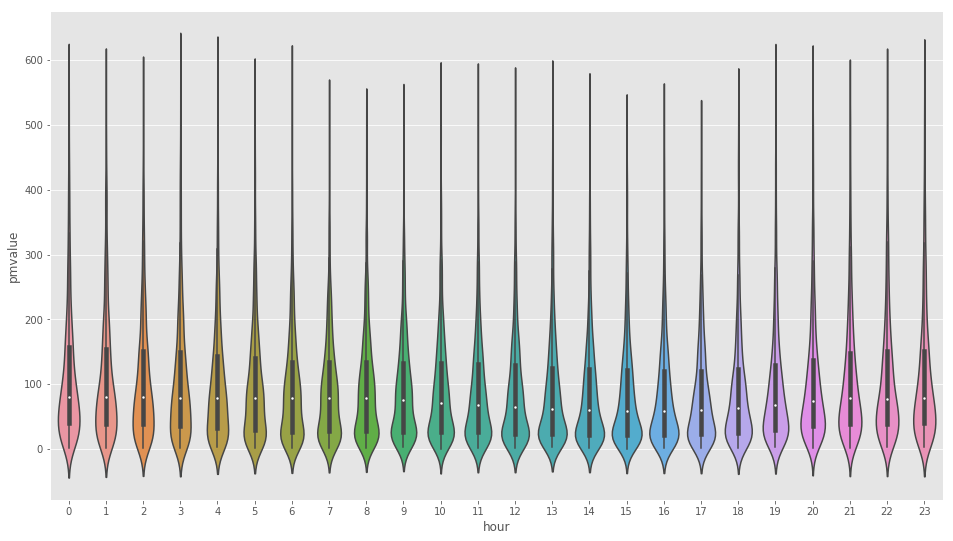

In [326]:
ax = sns.violinplot(x="hour", y="pmvalue", data=df)

## Feature Selection

### Step1 Change target value to format that we can predict better
Now, we have target value which is pm2.5(μg/m3). However, we can change this value into AQI Category which is the way normal people can understand it. AQI Category has six groups from good to hazardous. We can use this category to determine the air quality. 

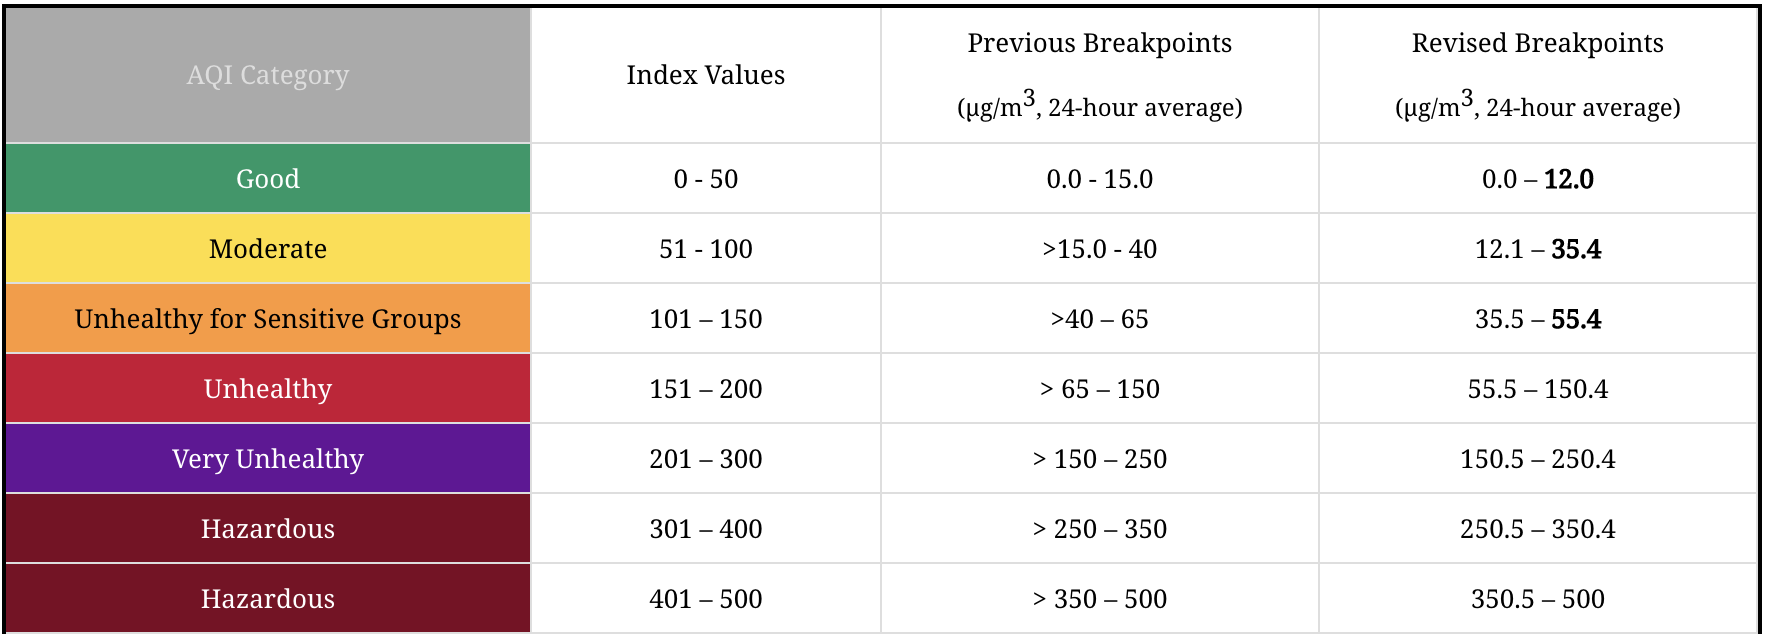

After this transformation, we may have four columns with the NaN pm value. We can simply drop all the data with NaN value on pm2.5. Because dropping these data will cause only few changes to the result.

In [327]:
df['PMValue_category'] = pd.cut(df['pmvalue'],[-50,12,35.4,55.4,150.4,250.4,1000],labels=[1,2,3,4,5,6])

In [328]:
df

,month,hour,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,date,pmvalue,PMValue_category
24,1,0,-16,-4.0,1020.0,SE,1.79,0,0,2010-01-02,129.0,4
25,1,1,-15,-4.0,1020.0,SE,2.68,0,0,2010-01-02,148.0,4
26,1,2,-11,-5.0,1021.0,SE,3.57,0,0,2010-01-02,159.0,5
27,1,3,-7,-5.0,1022.0,SE,5.36,1,0,2010-01-02,181.0,5
28,1,4,-7,-5.0,1022.0,SE,6.25,2,0,2010-01-02,138.0,4
29,1,5,-7,-6.0,1022.0,SE,7.14,3,0,2010-01-02,109.0,4
30,1,6,-7,-6.0,1023.0,SE,8.93,4,0,2010-01-02,105.0,4
31,1,7,-7,-5.0,1024.0,SE,10.72,0,0,2010-01-02,124.0,4
32,1,8,-8,-6.0,1024.0,SE,12.51,0,0,2010-01-02,120.0,4
33,1,9,-7,-5.0,1025.0,SE,14.30,0,0,2010-01-02,132.0,4


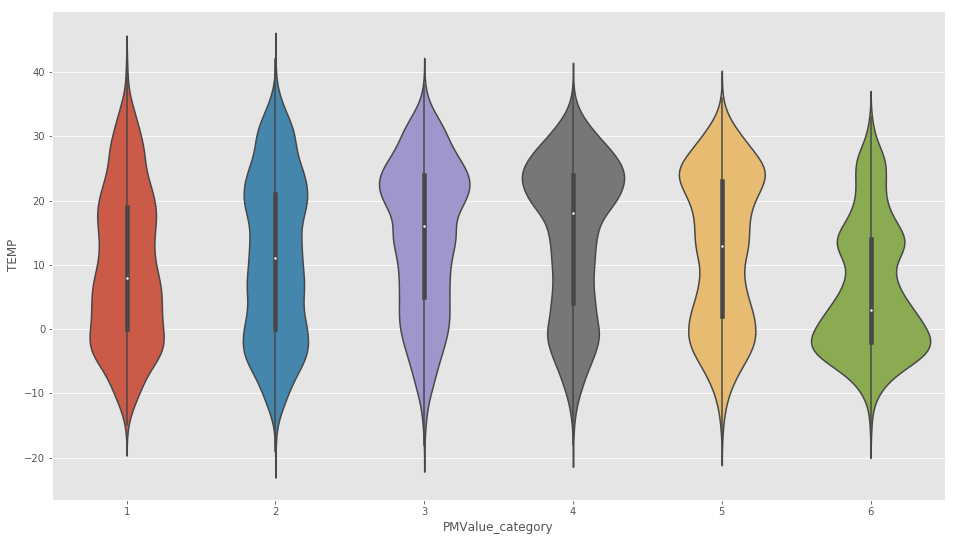

In [329]:
ax = sns.violinplot(x="PMValue_category", y="TEMP", data=df)

In [330]:
df.head()

,month,hour,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,date,pmvalue,PMValue_category
24,1,0,-16,-4.0,1020.0,SE,1.79,0,0,2010-01-02,129.0,4
25,1,1,-15,-4.0,1020.0,SE,2.68,0,0,2010-01-02,148.0,4
26,1,2,-11,-5.0,1021.0,SE,3.57,0,0,2010-01-02,159.0,5
27,1,3,-7,-5.0,1022.0,SE,5.36,1,0,2010-01-02,181.0,5
28,1,4,-7,-5.0,1022.0,SE,6.25,2,0,2010-01-02,138.0,4


### Step2 Add the previous 5 shifts useful column for better prediction
Using current wind speed, wind direction and temperature is quite difficult to have a great correct prediction for PM value. So, we can solve this problem by adding previous 5 feature to solve this problem. By adding those column, we can have almost 15% better prediction scores in most classifier model.

In [331]:
import warnings
warnings.filterwarnings('ignore')
df['pmvalue_1'] = df.pmvalue.shift(periods=1)
df['TEMP_1'] = df.TEMP.shift(periods=1)
df['Iws_1'] = df.Iws.shift(periods=1)
df['DEWP_1'] = df.DEWP.shift(periods=1)
df['cbwd_1'] = df.cbwd.shift(periods=1)
df['pmvalue_2'] = df.pmvalue.shift(periods=2)
df['TEMP_2'] = df.TEMP.shift(periods=2)
df['Iws_2'] = df.Iws.shift(periods=2)
df['DEWP_2'] = df.DEWP.shift(periods=2)
df['cbwd_2'] = df.cbwd.shift(periods=2)
df['pmvalue_3'] = df.pmvalue.shift(periods=3)
df['TEMP_3'] = df.TEMP.shift(periods=3)
df['Iws_3'] = df.Iws.shift(periods=3)
df['DEWP_3'] = df.DEWP.shift(periods=3)
df['cbwd_3'] = df.cbwd.shift(periods=3)

In [332]:
df.head()

,month,hour,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,date,...,pmvalue_2,TEMP_2,Iws_2,DEWP_2,cbwd_2,pmvalue_3,TEMP_3,Iws_3,DEWP_3,cbwd_3
24,1,0,-16,-4.0,1020.0,SE,1.79,0,0,2010-01-02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,1,1,-15,-4.0,1020.0,SE,2.68,0,0,2010-01-02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,1,2,-11,-5.0,1021.0,SE,3.57,0,0,2010-01-02,...,129.0,-4.0,1.79,-16.0,SE,NaN,NaN,NaN,NaN,NaN
27,1,3,-7,-5.0,1022.0,SE,5.36,1,0,2010-01-02,...,148.0,-4.0,2.68,-15.0,SE,129.0,-4.0,1.79,-16.0,SE
28,1,4,-7,-5.0,1022.0,SE,6.25,2,0,2010-01-02,...,159.0,-5.0,3.57,-11.0,SE,148.0,-4.0,2.68,-15.0,SE


### Step3 change the data type of wind direction to category
In order to use the wind direction in the ML model, we can simply transform the data type of all the wind direction related column from String to category.

In [333]:
df.dtypes

month                        int64
hour                         int64
DEWP                         int64
TEMP                       float64
PRES                       float64
cbwd                        object
Iws                        float64
Is                           int64
Ir                           int64
date                datetime64[ns]
pmvalue                    float64
PMValue_category          category
pmvalue_1                  float64
TEMP_1                     float64
Iws_1                      float64
DEWP_1                     float64
cbwd_1                      object
pmvalue_2                  float64
TEMP_2                     float64
Iws_2                      float64
DEWP_2                     float64
cbwd_2                      object
pmvalue_3                  float64
TEMP_3                     float64
Iws_3                      float64
DEWP_3                     float64
cbwd_3                      object
dtype: object

In [334]:
wind = {'SE': 1,'cv': 2, 'NW':3,'NE':4} 
df.cbwd = [wind[item] for item in df.cbwd] 

In [335]:
df = df.drop(['date','pmvalue'],axis = 1)

In [336]:
df.dtypes

month                  int64
hour                   int64
DEWP                   int64
TEMP                 float64
PRES                 float64
cbwd                   int64
Iws                  float64
Is                     int64
Ir                     int64
PMValue_category    category
pmvalue_1            float64
TEMP_1               float64
Iws_1                float64
DEWP_1               float64
cbwd_1                object
pmvalue_2            float64
TEMP_2               float64
Iws_2                float64
DEWP_2               float64
cbwd_2                object
pmvalue_3            float64
TEMP_3               float64
Iws_3                float64
DEWP_3               float64
cbwd_3                object
dtype: object

In [337]:
df = df.dropna(axis=0)

In [338]:
df.head()
wind = {'SE': 1,'cv': 2, 'NW':3,'NE':4} 
df.cbwd_1 = [wind[item1] for item1 in df.cbwd_1] 
df.cbwd_2 = [wind[item2] for item2 in df.cbwd_2] 
df.cbwd_3 = [wind[item3] for item3 in df.cbwd_3] 

In [339]:
df.dtypes

month                  int64
hour                   int64
DEWP                   int64
TEMP                 float64
PRES                 float64
cbwd                   int64
Iws                  float64
Is                     int64
Ir                     int64
PMValue_category    category
pmvalue_1            float64
TEMP_1               float64
Iws_1                float64
DEWP_1               float64
cbwd_1                 int64
pmvalue_2            float64
TEMP_2               float64
Iws_2                float64
DEWP_2               float64
cbwd_2                 int64
pmvalue_3            float64
TEMP_3               float64
Iws_3                float64
DEWP_3               float64
cbwd_3                 int64
dtype: object

In [340]:
pd.unique(df.cbwd)

array([1, 2, 3, 4])

In [341]:
y = df['PMValue_category']

In [342]:
X = df.drop(['PMValue_category'], axis=1)

## TRAIN/TEST SPLIT
We simply split the total data into 70% part and 30% part. We use 70% to train the model and use 30% to validate the model.

In [343]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1234)

In [344]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((29205, 24), (29205,), (12517, 24), (12517,))

## APPLY ML Model
Here we choose four models for prediction, which is Gradient Boosted Machine, MulticlassNeural Network, Ridge Regression and Random Forest.

In [345]:
from sklearn.metrics import confusion_matrix, classification_report

### 1.Random Forest

In [421]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create Random Forest Regressor object
for n in range(50,300,50):
    rf = RandomForestClassifier(n_estimators=n)
    rf.fit(X_train, y_train)
    rf_score = rf.score(X_test, y_test)
    print(f'scores:{rf_score} n:{n}')

scores:0.7935607573699768 n:50
scores:0.7955580410641527 n:100
scores:0.7934808660222098 n:150
scores:0.7963569545418231 n:200
scores:0.7947591275864824 n:250


In [436]:
rf = RandomForestClassifier(n_estimators=200)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [437]:
rf_score = rf.score(X_test, y_test)
rf_score

0.7948390189342495

In [438]:
rf_pred = rf.predict(X_test)
rf_pred

array([3, 4, 2, ..., 2, 4, 5])

In [439]:
confusion_rf = confusion_matrix(y_test, rf_pred)

In [440]:
confusion_rf

array([[ 688,  318,    2,    4,    1,    0],
       [ 208, 2112,  247,   74,    2,    0],
       [   2,  308,  817,  343,    6,    0],
       [   0,   37,  295, 4141,  239,    7],
       [   0,    0,    2,  262, 1397,   83],
       [   0,    1,    1,    4,  122,  794]])

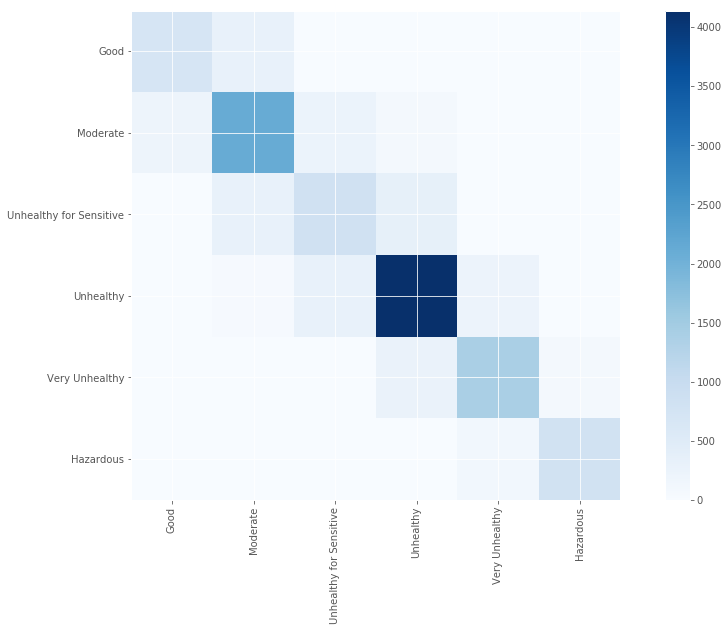

In [442]:
columns = ['Good','Moderate','Unhealthy for Sensitive','Unhealthy','Very Unhealthy','Hazardous']

plt.imshow(confusion_rf, cmap=plt.cm.Blues, interpolation='nearest')
plt.xticks([0,1,2,3,4,5], columns, rotation='vertical')
plt.yticks([0,1,2,3,4,5], columns)
plt.colorbar()

plt.show()

### 2.Multiclass Neural Network

In [354]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Create MLPClassifier object
mlp = MLPClassifier(activation='logistic', random_state=13)
mlp.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=13, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [355]:
multiclass_neural_network_score = mlp.score(X_test, y_test)
multiclass_neural_network_score

0.7762243349045298

In [356]:
nn_pred = mlp.predict(X_test)
nn_pred

array([3, 4, 2, ..., 2, 4, 5])

In [357]:
confusion_nn = confusion_matrix(y_test,nn_pred)
confusion_nn

array([[ 380,  626,    2,    4,    1,    0],
       [  71, 2264,  240,   66,    2,    0],
       [   1,  321,  759,  390,    5,    0],
       [   0,   47,  227, 4314,  122,    9],
       [   0,    0,    3,  441, 1156,  144],
       [   0,    2,    1,    2,   74,  843]])

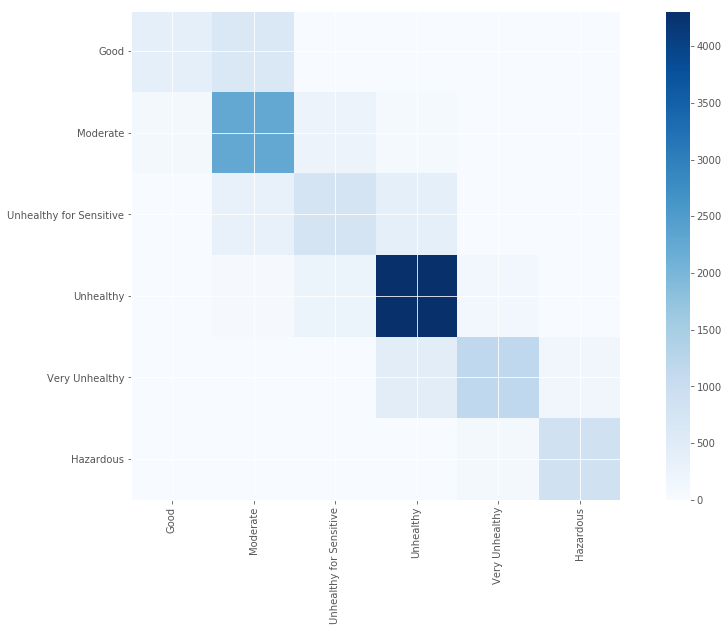

In [358]:
columns = ['Good','Moderate','Unhealthy for Sensitive','Unhealthy','Very Unhealthy','Hazardous']

plt.imshow(confusion_nn, cmap=plt.cm.Blues, interpolation='nearest')
plt.xticks([0,1,2,3,4,5], columns, rotation='vertical')
plt.yticks([0,1,2,3,4,5], columns)
plt.colorbar()

plt.show()

### 3. Ridge Regression

In [359]:
from sklearn.linear_model import Ridge

In [360]:
ridge = Ridge(alpha=0.01)

In [361]:
ridge.fit(X_train, y_train) 

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [362]:
ridge_score = ridge.score(X_test,y_test)

In [363]:
ridge_score

0.781640696150696

In [364]:
ridge_pred = ridge.predict(X_test)
ridge_pred

array([2.87908394, 4.24038376, 2.41527882, ..., 2.23809715, 3.38652028,
       5.07071044])

In [365]:
ridge_pred = np.round(ridge_pred)
ridge_pred

array([3., 4., 2., ..., 2., 3., 5.])

In [366]:
confusion_ridge = confusion_matrix(y_test,ridge_pred)
confusion_ridge

array([[  74,  869,   67,    3,    0,    0,    0,    0,    0],
       [  83, 1574,  966,   19,    1,    0,    0,    0,    0],
       [   2,  189, 1179,  106,    0,    0,    0,    0,    0],
       [   1,   54, 1646, 2876,  137,    5,    0,    0,    0],
       [   0,    2,   10,  568, 1093,   67,    2,    2,    0],
       [   0,    1,    2,    8,  198,  441,  195,   65,   12],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0]])

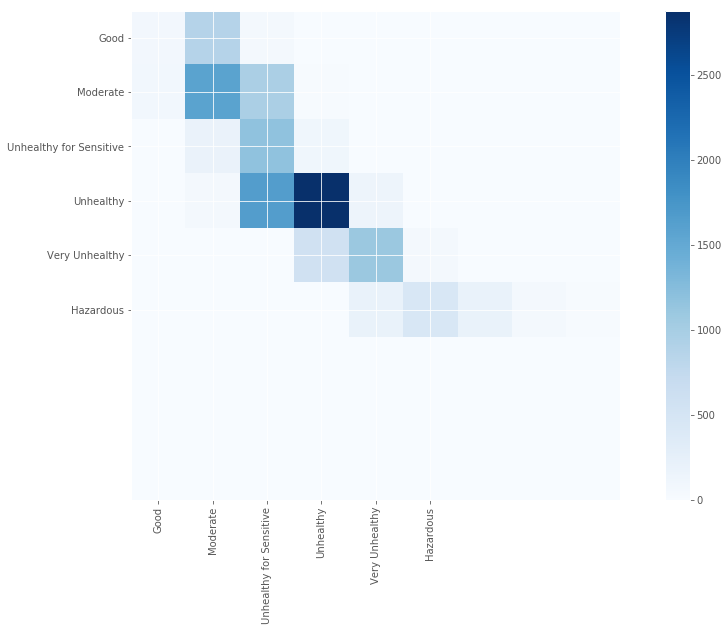

In [367]:
columns = ['Good','Moderate','Unhealthy for Sensitive','Unhealthy','Very Unhealthy','Hazardous']

plt.imshow(confusion_ridge, cmap=plt.cm.Blues, interpolation='nearest')
plt.xticks([0,1,2,3,4,5], columns, rotation='vertical')
plt.yticks([0,1,2,3,4,5], columns)
plt.colorbar()

plt.show()

### 4.Gradient Boosted Machine

In [368]:
from sklearn.ensemble import GradientBoostingRegressor

for depth in range(4,7,1):
    for min_samples_split in range(2,5,1):
        params = {'n_estimators': 500, 'max_depth': depth, 'min_samples_split': min_samples_split,
                   'learning_rate': 0.01, 'loss': 'ls'}
        gbr = GradientBoostingRegressor(**params)
        gbr.fit(X_train, y_train)
        gbr_score = gbr.score(X_test,y_test)
        print(f'scores:{gbr_score} depth:{depth} min_samples_split:{min_samples_split}')


scores:0.8994908235021393 depth:4 min_samples_split:2
scores:0.8995000317743151 depth:4 min_samples_split:3
scores:0.8994932314051252 depth:4 min_samples_split:4
scores:0.9005806863746991 depth:5 min_samples_split:2
scores:0.9005381679743648 depth:5 min_samples_split:3
scores:0.9005264201329765 depth:5 min_samples_split:4
scores:0.9008095797571606 depth:6 min_samples_split:2
scores:0.9008312298171357 depth:6 min_samples_split:3
scores:0.9007582441581594 depth:6 min_samples_split:4


In [369]:
# gbr_score = gbr.score(X_test,y_test)
# gbr_score


In [370]:
gbr_pred = gbr.predict(X_test)
gbr_pred

array([2.58762081, 4.04265539, 1.96675533, ..., 2.0925194 , 3.84412068,
       4.9849367 ])

In [371]:
np.round(gbr_pred)

array([3., 4., 2., ..., 2., 4., 5.])

In [372]:
gbr_score = gbr.score(X_test,y_test)
gbr_score

0.9007582441581594

In [373]:
gbr_pred =  np.round(gbr_pred)

In [374]:
confusion_gbr = confusion_matrix(y_test,gbr_pred)
confusion_gbr

array([[ 670,  336,    3,    3,    1,    0],
       [ 187, 2066,  334,   55,    1,    0],
       [   2,  209,  985,  276,    4,    0],
       [   0,   28,  387, 4063,  237,    4],
       [   0,    0,    6,  248, 1419,   71],
       [   0,    1,    4,    1,  135,  781]])

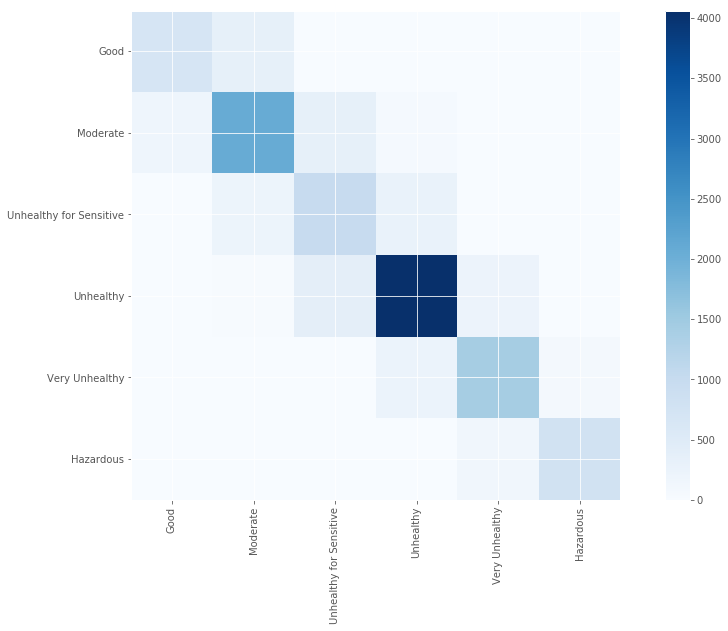

In [375]:
columns = ['Good','Moderate','Unhealthy for Sensitive','Unhealthy','Very Unhealthy','Hazardous']

plt.imshow(confusion_gbr, cmap=plt.cm.Blues, interpolation='nearest')
plt.xticks([0,1,2,3,4,5], columns, rotation='vertical')
plt.yticks([0,1,2,3,4,5], columns)
plt.colorbar()

plt.show()

Ensemble methods are machine learning techniques that combine several base models together to create a optimal predicting model. We can see that many ensemble methods in our test, such as random forest, gradient boosting machine, and Adaptive Boosting method, have great performance when compared to other solution. After several parameter tuning, gradient boosting can even get the prediction rate at 90%.

Moreover, I also use some other models to do the predictions, such as K-nearest neighbor, naïve bayes, ElasticNet Regression and Lasso Regression. However, the prediction results of those models are relatively lower when compared to my final three choices. 

### 1.Naive Bayes

In [376]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
gnb_score = gnb.score(X_test,y_test)
gnb_score

0.5645122633218822

In [377]:
gnb_pred = gnb.predict(X_test)
gnb_pred

array([4, 4, 1, ..., 1, 4, 5])

In [378]:
confusion_gnb = confusion_matrix(y_test,gnb_pred)
confusion_gnb

array([[ 904,    8,   87,    9,    1,    4],
       [1581,  159,  660,  209,   10,   24],
       [ 139,  208,  546,  563,    9,   11],
       [  17,  158,  448, 3548,  452,   96],
       [   0,    6,    5,  228, 1139,  366],
       [   1,    0,    0,    5,  146,  770]])

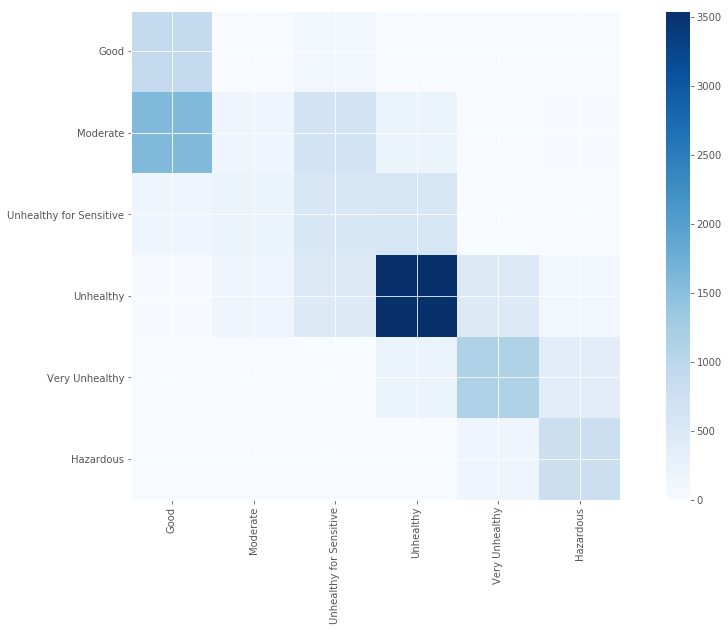

In [379]:
columns = ['Good','Moderate','Unhealthy for Sensitive','Unhealthy','Very Unhealthy','Hazardous']

plt.imshow(confusion_gnb, cmap=plt.cm.Blues, interpolation='nearest')
plt.xticks([0,1,2,3,4,5], columns, rotation='vertical')
plt.yticks([0,1,2,3,4,5], columns)
plt.colorbar()

plt.show()

### 2.Adaptive Boosting

In [380]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
adaboost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=6, min_samples_split=3), n_estimators=500, learning_rate=0.01)
adaboost.fit(X_train, y_train)
adaboost_score = adaboost.score(X_test, y_test)
adaboost_score

0.7820564032915235

In [381]:
adaboost_pred = adaboost.predict(X_test)
adaboost_pred

array([3, 4, 2, ..., 2, 4, 5])

In [382]:
confusion_adaboost = confusion_matrix(y_test,adaboost_pred)
confusion_adaboost

array([[ 641,  364,    2,    5,    1,    0],
       [ 201, 2068,  302,   69,    3,    0],
       [   0,  253,  920,  298,    5,    0],
       [   0,   32,  382, 4107,  192,    6],
       [   0,    0,    2,  311, 1401,   30],
       [   0,    1,    0,    5,  264,  652]])

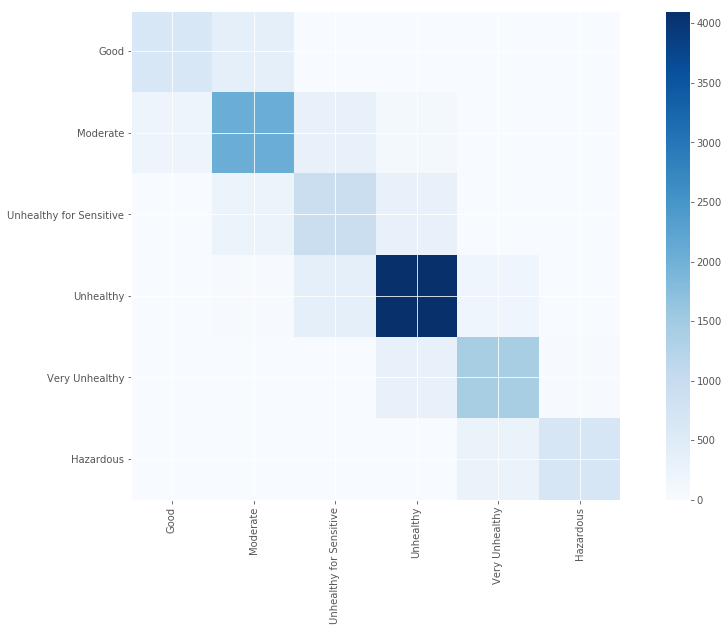

In [383]:
columns = ['Good','Moderate','Unhealthy for Sensitive','Unhealthy','Very Unhealthy','Hazardous']

plt.imshow(confusion_adaboost, cmap=plt.cm.Blues, interpolation='nearest')
plt.xticks([0,1,2,3,4,5], columns, rotation='vertical')
plt.yticks([0,1,2,3,4,5], columns)
plt.colorbar()

plt.show()

### 3.Multiclass Logistic Regression

In [384]:
from sklearn.linear_model import LogisticRegression
log_regr = LogisticRegression()
log_regr.fit(X_train, y_train)
logistic_regression_score = log_regr.score(X_test, y_test)
logistic_regression_score

0.6435248062634816

In [385]:
lr_pred = log_regr.predict(X_test)
lr_pred

array([4, 4, 2, ..., 2, 4, 4])

In [386]:
confusion_lr = confusion_matrix(y_test,lr_pred)
confusion_lr

array([[ 397,  600,    0,   16,    0,    0],
       [  87, 1989,    0,  566,    1,    0],
       [   1,  345,    0, 1129,    1,    0],
       [   0,  107,    0, 4580,   22,   10],
       [   0,    3,    0, 1339,  288,  114],
       [   0,    3,    0,   37,   81,  801]])

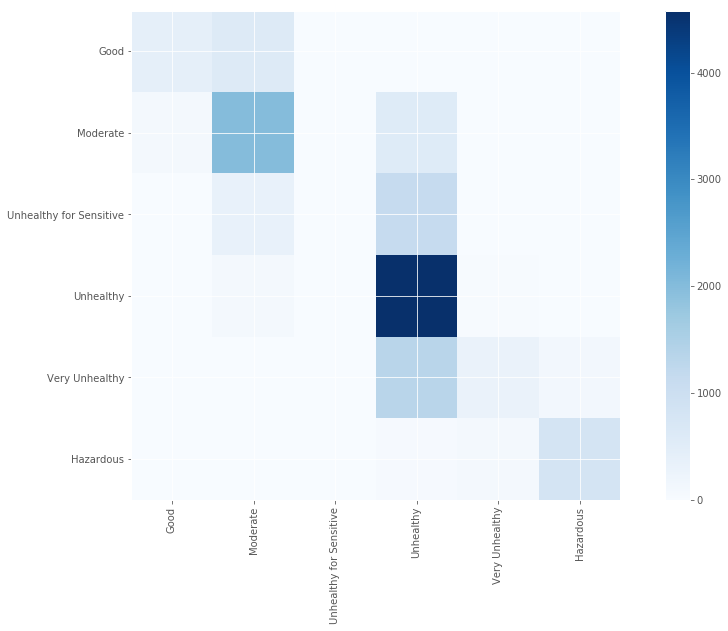

In [387]:
columns = ['Good','Moderate','Unhealthy for Sensitive','Unhealthy','Very Unhealthy','Hazardous']

plt.imshow(confusion_lr, cmap=plt.cm.Blues, interpolation='nearest')
plt.xticks([0,1,2,3,4,5], columns, rotation='vertical')
plt.yticks([0,1,2,3,4,5], columns)
plt.colorbar()

plt.show()

### 4.Lasso Regression

In [388]:
from sklearn.datasets import make_regression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
lassocv = LassoCV()
lassocv.fit(X_train,y_train)
Lasso_regression_score = lassocv.score(X_test,y_test)
Lasso_regression_score

0.7690345371699002

In [389]:
lassocv_pred = lassocv.predict(X_test)
lassocv_pred

array([2.88524285, 3.89379635, 2.42460064, ..., 2.35190873, 3.54589921,
       4.96490189])

In [390]:
lassocv_pred = np.round(lassocv_pred)

In [391]:
confusion_lassocv = confusion_matrix(y_test,lassocv_pred)
confusion_lassocv

array([[  33,  863,  113,    4,    0,    0,    0,    0,    0],
       [  62, 1483, 1078,   18,    2,    0,    0,    0,    0],
       [   0,  143, 1295,   37,    1,    0,    0,    0,    0],
       [   1,   33, 1946, 2650,   82,    7,    0,    0,    0],
       [   0,    2,   10,  602, 1067,   59,    2,    2,    0],
       [   0,    0,    3,    7,  174,  431,  225,   69,   13],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0]])

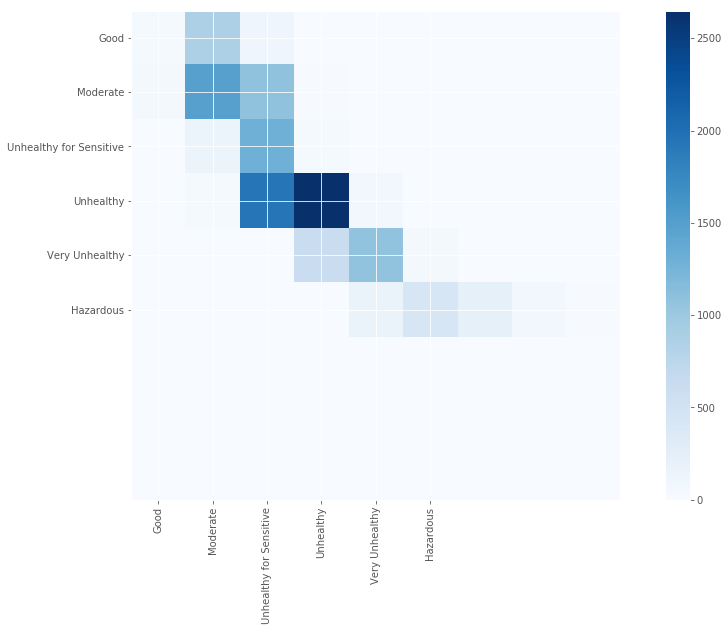

In [392]:
columns = ['Good','Moderate','Unhealthy for Sensitive','Unhealthy','Very Unhealthy','Hazardous']

plt.imshow(confusion_lassocv, cmap=plt.cm.Blues, interpolation='nearest')
plt.xticks([0,1,2,3,4,5], columns, rotation='vertical')
plt.yticks([0,1,2,3,4,5], columns)
plt.colorbar()

plt.show()

### 5.ElasticNet Regression

In [393]:
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression
EN_regr = ElasticNet(random_state=0)
EN_regr.fit(X_train, y_train)
EN_regr_score = EN_regr.score(X_test,y_test)
EN_regr_score

0.735487590219354

In [394]:
EN_regr_pred = EN_regr.predict(X_test)
EN_regr_pred

array([2.84572584, 3.53925548, 2.46955317, ..., 2.4717244 , 3.60901532,
       4.87650984])

In [395]:
EN_regr_pred = np.round(EN_regr_pred)
EN_regr_pred

array([3., 4., 2., ..., 2., 4., 5.])

In [396]:
confusion_EN_regr = confusion_matrix(y_test,EN_regr_pred)
confusion_EN_regr

array([[  21,  769,  219,    3,    1,    0,    0,    0,    0],
       [  47, 1222, 1351,   21,    2,    0,    0,    0,    0],
       [   0,   88, 1355,   31,    2,    0,    0,    0,    0],
       [   1,   14, 2309, 2305,   81,    7,    2,    0,    0],
       [   0,    1,   12,  675,  976,   76,    2,    2,    0],
       [   0,    0,    3,    9,  147,  439,  224,   81,   19],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0]])

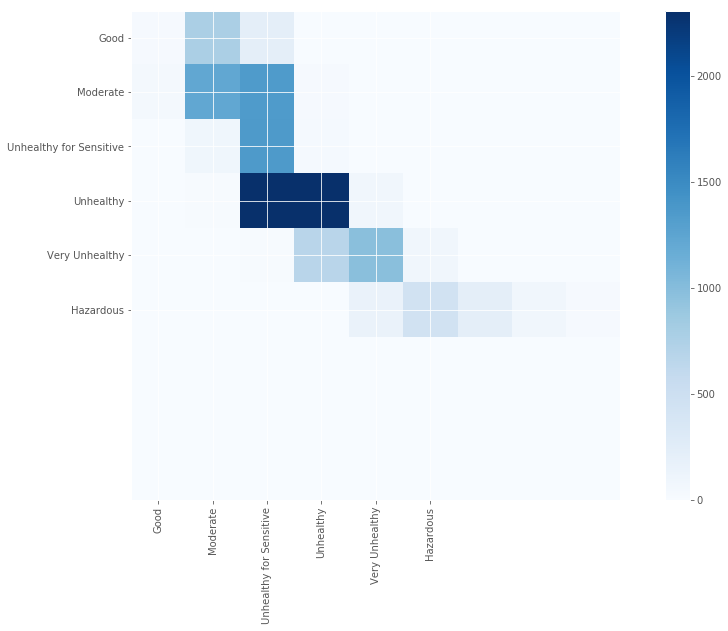

In [397]:
columns = ['Good','Moderate','Unhealthy for Sensitive','Unhealthy','Very Unhealthy','Hazardous']

plt.imshow(confusion_EN_regr, cmap=plt.cm.Blues, interpolation='nearest')
plt.xticks([0,1,2,3,4,5], columns, rotation='vertical')
plt.yticks([0,1,2,3,4,5], columns)
plt.colorbar()

plt.show()

### 6.K-Nearest Neighbors

In [413]:
from sklearn import neighbors 

for k in range(4,13,1):
    knn = neighbors.KNeighborsClassifier(k, weights='distance')
    knn.fit(X_train,y_train)
    knn_score = knn.score(X_test,y_test)
    print(f'scores:{knn_score} k:{k}')


scores:0.7575297595270433 k:4
scores:0.7645601981305424 k:5
scores:0.7647199808260765 k:6
scores:0.769992809778701 k:7
scores:0.7703922665175361 k:8
scores:0.7715906367340417 k:9
scores:0.7719102021251099 k:10
scores:0.7712710713429736 k:11
scores:0.7723895502117121 k:12


In [414]:
knn_pred = knn.predict(X_test)
knn_pred

array([3, 4, 2, ..., 2, 4, 5])

In [415]:
confusion_knn = confusion_matrix(knn_pred,y_test)
confusion_knn

array([[ 559,  222,    2,    0,    0,    0],
       [ 444, 2034,  317,   52,    2,    2],
       [   4,  300,  784,  302,    0,    1],
       [   5,   81,  367, 4116,  265,    2],
       [   1,    5,    6,  238, 1387,  129],
       [   0,    1,    0,   11,   90,  788]])

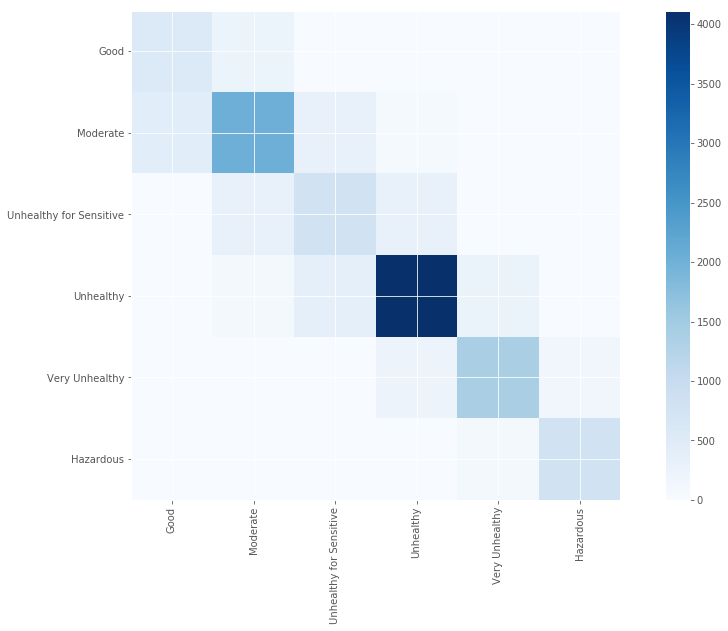

In [416]:
columns = ['Good','Moderate','Unhealthy for Sensitive','Unhealthy','Very Unhealthy','Hazardous']

plt.imshow(confusion_knn, cmap=plt.cm.Blues, interpolation='nearest')
plt.xticks([0,1,2,3,4,5], columns, rotation='vertical')
plt.yticks([0,1,2,3,4,5], columns)
plt.colorbar()

plt.show()

### Evaluation about all above models prediction results:

In [417]:
print("ML Model Performance:")
print("Random Forest prediction results",rf_score)
print("Multiclass Neural network prediction results",multiclass_neural_network_score)
print("Ridge Regression prediction results",ridge_score)
print("Gradient Boosted Machine prediction results",gbr_score)
print("Naive Bayes prediction results",gnb_score)
print("Adaptive Boosting prediction results",adaboost_score)
print("Multiclass Logistic Regression prediction results",logistic_regression_score)
print("Lasso Regression prediction results",Lasso_regression_score)
print("ElasticNet Regression prediction results",EN_regr_score)
print("K-Nearest Neighbors prediction score",knn_score)


ML Model Performance:
Random Forest prediction results 0.7957178237596868
Multiclass Neural network prediction results 0.7762243349045298
Ridge Regression prediction results 0.781640696150696
Gradient Boosted Machine prediction results 0.9007582441581594
Naive Bayes prediction results 0.5645122633218822
Adaptive Boosting prediction results 0.7820564032915235
Multiclass Logistic Regression prediction results 0.6435248062634816
Lasso Regression prediction results 0.7690345371699002
ElasticNet Regression prediction results 0.735487590219354
K-Nearest Neighbors prediction score 0.7723895502117121


### So far, we simply use general parameters to implement several ML models. After careful parameter tuning, each models may have better performance. Among above models, Gradient Boosted Machine have the best performance about PM2.5 prediction. 

Reference

1.Evan Lutins(2017) Ensemble Methods in Machine Learning: What are They and Why Use Them? 

2.Robert Ritz(2016) Predicting PM2.5 Using Machine Learning — Part 3, The Model 

3.Revised PM2.5 AQI breakpoints 